In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
sns.set(style="whitegrid")

In [3]:
os.chdir("../../")

In [4]:
api = KaggleApi()
api.authenticate()

In [5]:
DATA_PATH = os.path.join(os.getcwd(), "data")

In [6]:
os.makedirs(DATA_PATH, exist_ok=True)

In [7]:
api.dataset_download_files(
    dataset="fedesoriano/heart-failure-prediction",
    path=DATA_PATH,
)

In [8]:
!unzip data/heart-failure-prediction.zip -d data
!rm data/heart-failure-prediction.zip

Archive:  data/heart-failure-prediction.zip
  inflating: data/heart.csv          


In [14]:
TARGET_COL = "HeartDisease"

# Load data

In [10]:
df = pd.read_csv("data/heart.csv")

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

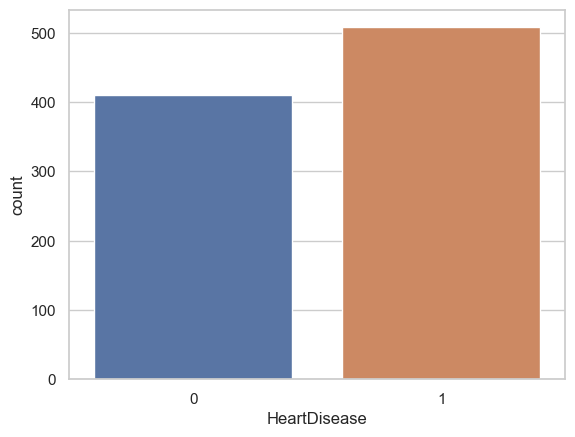

In [15]:
sns.countplot(data=df, x=TARGET_COL)

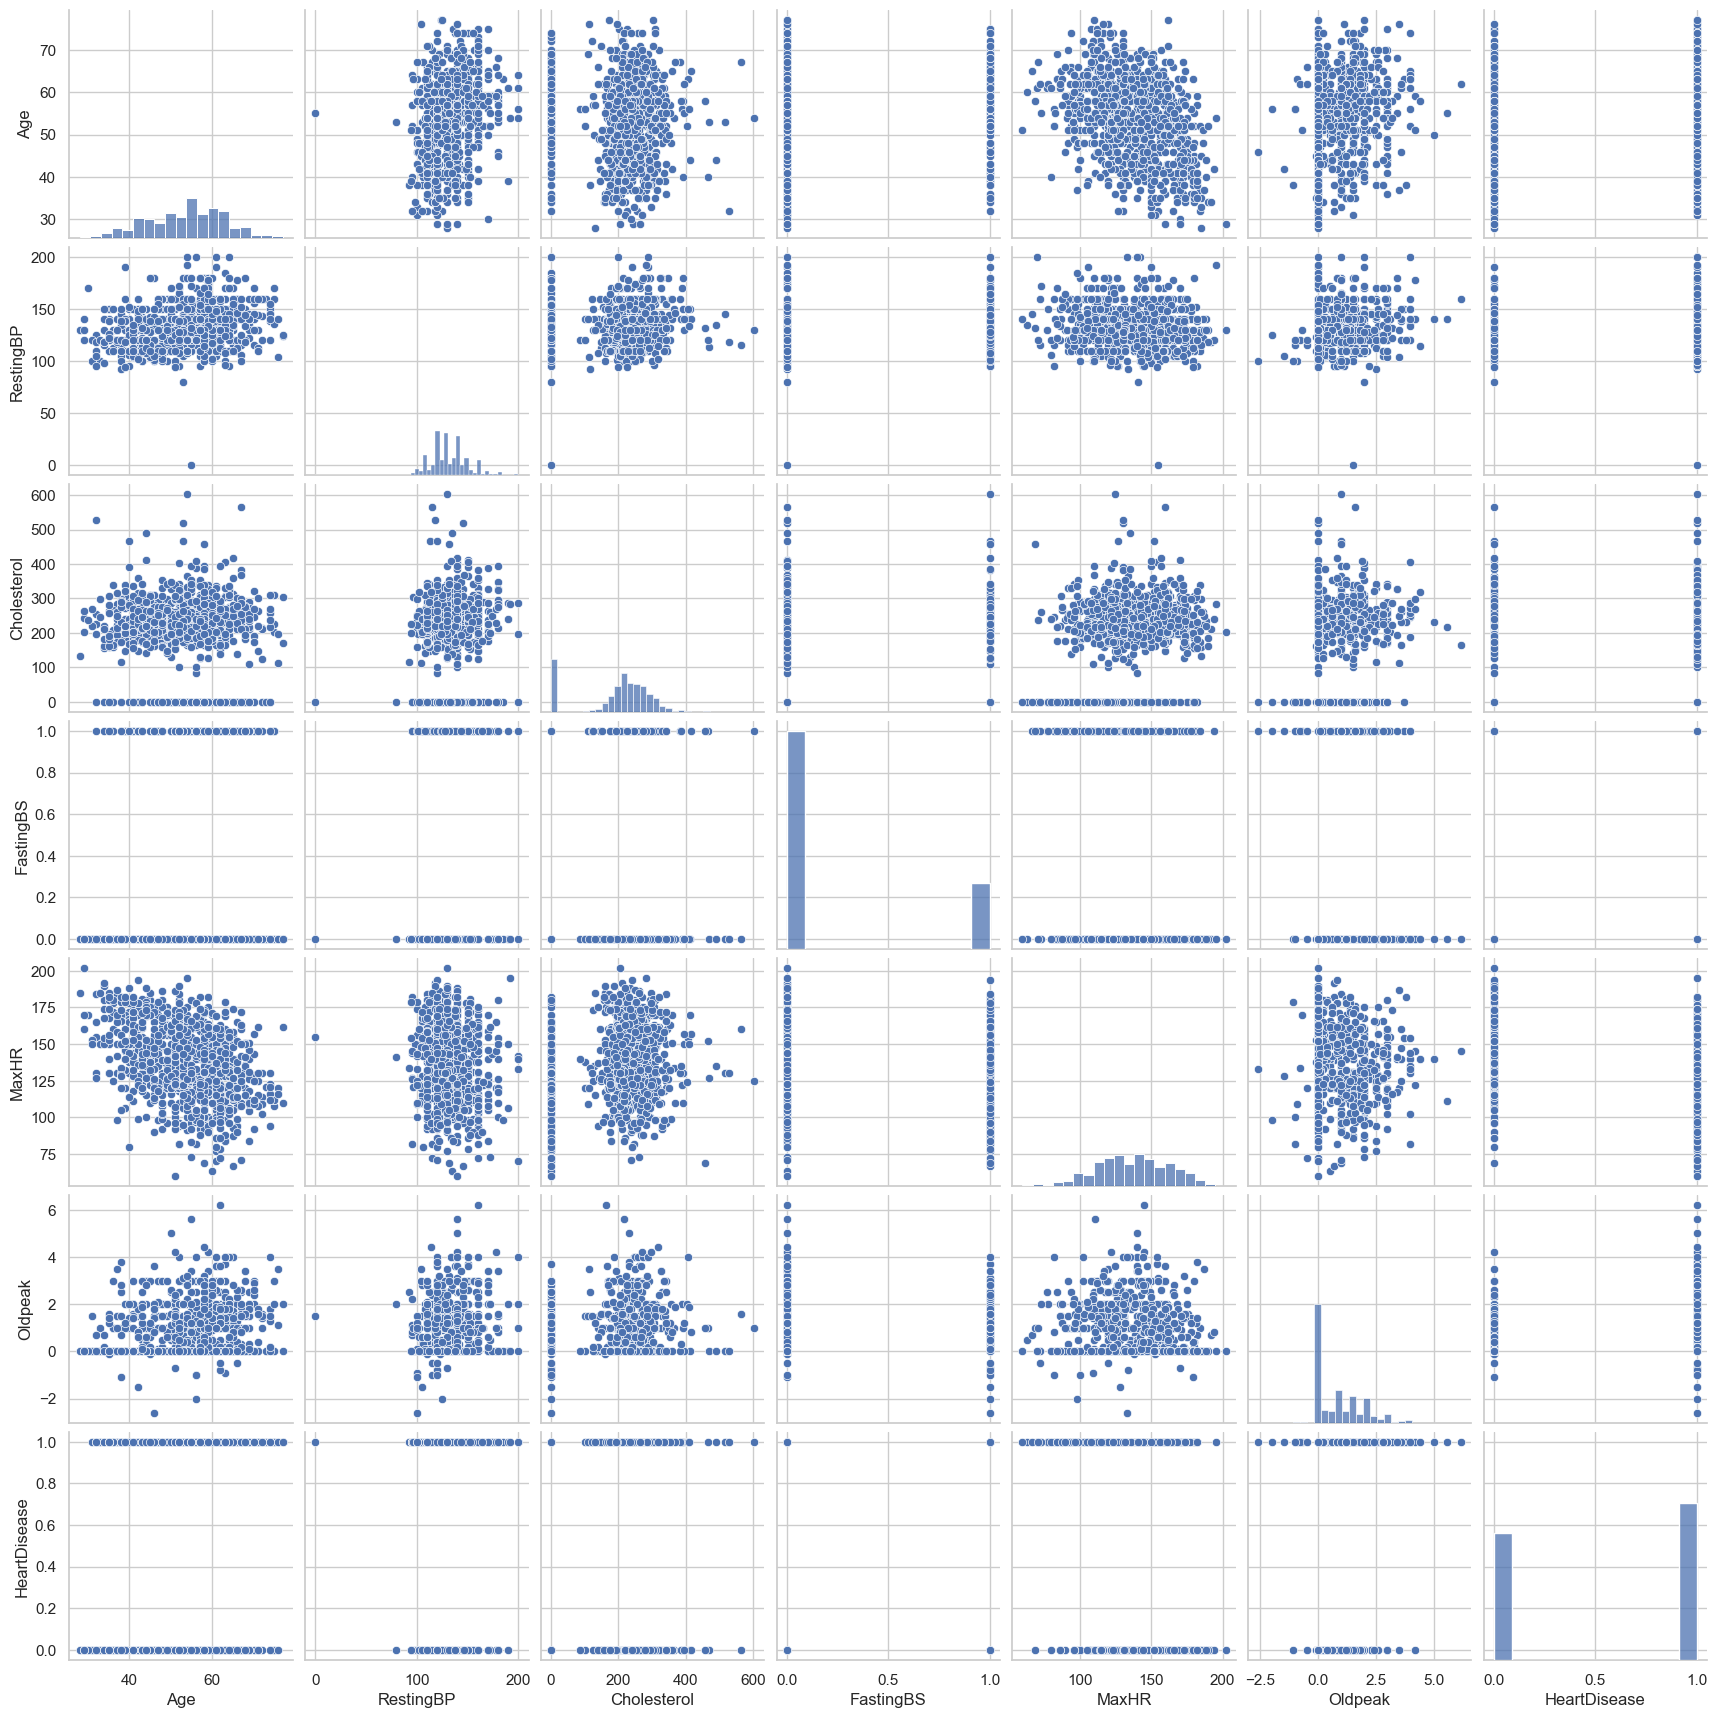

In [16]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'Missing values (%)')

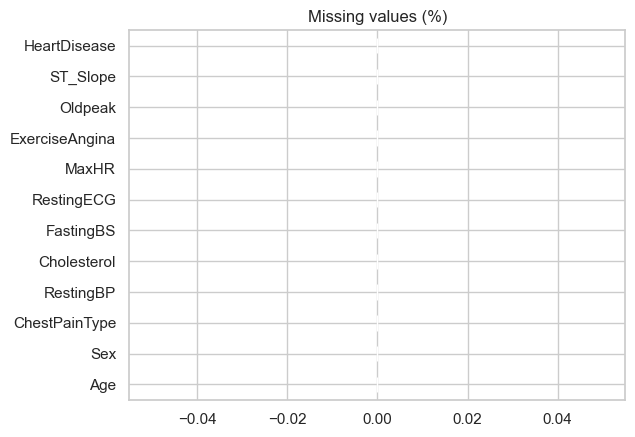

In [17]:
missing_values = df.isna().sum()
missing_values /= df.shape[0]
missing_values *= 100
missing_values.sort_values(ascending=True).plot(kind="barh")
plt.title("Missing values (%)")

# Train baseline

In [20]:
# Right now, let's drop all NaNs for simplicity
df = df.dropna()

In [21]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
import lightgbm as lgb

In [36]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [25]:
param_grid = {
    "n_estimators": [1000],
    "random_state": [42],
}

In [39]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring="accuracy",
)

In [40]:
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

In [42]:
grid_model.fit(X, y)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pavlo.seimskyi/Desktop/github-repos/water-quality/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pavlo.seimskyi/Desktop/github-repos/water-quality/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "/Users/pavlo.seimskyi/Desktop/github-repos/water-quality/.venv/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/pavlo.seimskyi/Desktop/github-repos/water-quality/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/Users/pavlo.seimskyi/Desktop/github-repos/water-quality/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/pavlo.seimskyi/Desktop/github-repos/water-quality/.venv/lib/python3.8/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'M'


In [78]:
grid_model.best_score_

0.48797386827912925